# Importing necessary librabies

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Dataset Loading and exploration

In [13]:
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target


In [14]:

df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] =y

# Display the first few rows of the DataFrame
print(df.head(5))


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [15]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


target
0    50
1    50
2    50
Name: count, dtype: int64


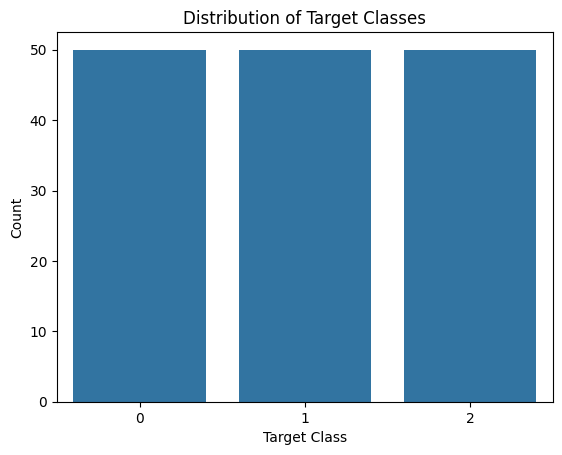

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Target distribution
print(df['target'].value_counts())

# Plot target distribution
sns.countplot(x='target', data=df)
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.title('Distribution of Target Classes')
plt.show()

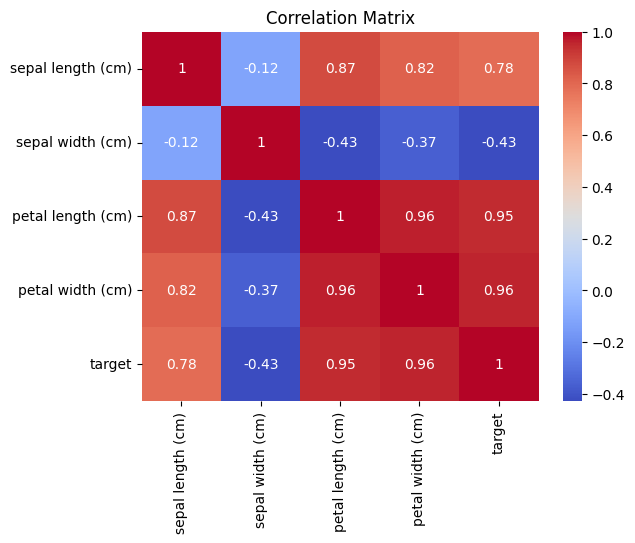

In [19]:
# Heatmap of the correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Split the dataset

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standarize the features

Standardize the features to have zero mean and unit variance, which can improve the performance of the KNN algorithm.

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#  Train the KNN Model

In [22]:
k = 5  # You can choose any k value you think is appropriate
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# knn = KNeighborsClassifier(n_neighbors=k)

KNeighborsClassifier()

# Make Predictions

In [23]:
y_pred = knn.predict(X_test)

# Evaluate the Model

In [24]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)


Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [25]:
def get_user_input():
    sepal_length = float(input("Enter sepal length (cm): "))
    sepal_width = float(input("Enter sepal width (cm): "))
    petal_length = float(input("Enter petal length (cm): "))
    petal_width = float(input("Enter petal width (cm): "))
    return np.array([[sepal_length, sepal_width, petal_length, petal_width]])


user_input = get_user_input()

# Standardize the input data using the same scaler
user_input_standardized = scaler.transform(user_input)

# Predict the class of the input data
user_prediction = knn.predict(user_input_standardized)
user_predicted_class = iris.target_names[user_prediction][0]

print(f"The predicted class for the input data is: {user_predicted_class}")


KeyboardInterrupt: Interrupted by user